In [1]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
#from googletrans import Translator
from google_trans_new import google_translator
translator = google_translator()
#translated = translator.translate(city, lang_tgt='en')
#translator = Translator()
import pandas as pd
import statsmodels.api as sm
import matplotlib.patches as mpatches

import json
import numpy as np
import time
import glob
import re
import ast
%matplotlib inline
from word2number import w2n
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk import stem
stemmer = stem.snowball.EnglishStemmer()
import string
import en_core_web_sm
import pytextrank
nlp = en_core_web_sm.load()
from gensim.models import KeyedVectors
import itertools
import os
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

english_words = words.words()
stop = stopwords.words('english')


import en_core_web_sm
nlp = en_core_web_sm.load()

# add PyTextRank to the spaCy pipeline

import pytextrank
tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)


from gensim.models import KeyedVectors
# Load vectors directly from the file
from scipy.spatial.distance import cityblock, cosine


from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
from wordcloud import WordCloud
from matplotlib import cm

from matplotlib import colors

from word2number import w2n
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk import stem
stemmer = stem.snowball.EnglishStemmer()
import string

os.chdir('/home/jupyter/juzi')
home_dir = '/home/jupyter/juzi'


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  
unable to import 'smart_open.gcs', disabling that module


In [2]:
china_data = pd.read_csv('paper_data/deal_news_data.csv',index_col=[0])
china_data['first_sentence_list'] = [np.nan]*len(china_data)
china_data['first_sentence_pos_list'] = [np.nan]*len(china_data)
china_data['first_sentence_useful_list'] = [np.nan]*len(china_data)
china_data['top_one'] = [np.nan]*len(china_data)
china_data['cat_list'] = [np.nan]*len(china_data)

china_data.shape

(8235, 7)

In [3]:
china_data.sort_values('deal_date').head()

,deal_date,detailed_deal_info,first_sentence_list,first_sentence_pos_list,first_sentence_useful_list,top_one,cat_list
0,2019-01-01,APP is a toxic tide shoes selling platform ide...,NaN,NaN,NaN,NaN,NaN
25,2019-01-01,O o One is to buy a community service platform...,NaN,NaN,NaN,NaN,NaN
24,2019-01-01,After a car is a focus on automotive vertical ...,NaN,NaN,NaN,NaN,NaN
23,2019-01-01,Australia Scone is a biopharmaceutical technol...,NaN,NaN,NaN,NaN,NaN
22,2019-01-01,On the day the park by Uncle Li (Li Zhiming) a...,NaN,NaN,NaN,NaN,NaN


In [6]:
# Model Google word2vec
word2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

## key terms 

In [7]:
first_sentence_list = []
first_sentence_pos_list = []
min_words = 15
null_cnt = china_data['first_sentence_list'].isnull().sum()

for i, fs, fsp in zip(china_data['detailed_deal_info'].values,
                       china_data['first_sentence_list'].values,
                       china_data['first_sentence_pos_list'].values):
    
    if null_cnt == 0:
        #print('all done')
        subset = fs#.astype(list)
        subset_pos = fsp #.astype(list)
        #print(subset)
        #print(subset_pos)
        first_sentence_list.append(subset)
        first_sentence_pos_list.append(subset_pos)
        continue
    if True:
    #if (type(fs)==float and pd.isnull(fs)) or (type(fs)!=float and len(fs)==0): #len(fs)==0:
        try:
            first_period = ' '.join(
        [i.text for i in nlp(i)][:[(i.pos_=='PUNCT') and (i.text=='.') for i in nlp(i)].index(True)]
    ).lower().replace('electricity business', 'online commerce')  #correct some obvious translation error
            first_period = first_period.replace('electric business', 'online commerce') #correct some obvious translation error
            first_period = first_period.replace('electronic business', 'online commerce') #correct some obvious translation error
            first_period = first_period.replace('us - pupil','cosmetic contact lenses') #correct some obvious translation error
        except: #no period
            #print('no period')
            first_period = i.lower().replace('electricity business', 'online commerce') #correct some obvious translation error
            first_period = first_period.replace('electric business', 'online commerce') #correct some obvious translation error
            first_period = first_period.replace('electronic business', 'online commerce') #correct some obvious translation error
            first_period = first_period.replace('us - pupil','cosmetic contact lenses')   #correct some obvious translation error
            
        texts = first_period.split(',') # first sentence only 
        list_useful = []
        list_useful_pos = []
        for text in texts:
            pos = [i.pos_ for i in nlp(text)]
            text = [i.text for i in nlp(text)]
            if ('VERB' not in pos) and ('AUX' not in pos):
                continue
            list_useful.append(text)
            list_useful_pos.append(pos)
        try:
            subset = list_useful[0]
            subset_pos = list_useful_pos[0]
            
            
            recur = 1
            
            while len(subset)< min_words and len(list_useful)>= recur+1:
                subset = list(itertools.chain.from_iterable(list_useful[:recur+1]))
                subset_pos = list(itertools.chain.from_iterable(list_useful_pos[:recur+1]))
                recur+=1
                #print('extending...')
                #print(subset)
    
        except:
            subset = list(np.array([i.text for i in nlp(first_period)])[
    [i.pos_ in ['NOUN','ADJ','PROPN'] for i in nlp(first_period)]])
            subset_pos = list(np.array([i.pos_ for i in nlp(first_period)])[
    [i.pos_ in ['NOUN','ADJ','PROPN'] for i in nlp(first_period)]]) 
    
    else:
        p#rint('done already')
        subset = fs#.astype(list)
        subset_pos = fsp#.astype(list)
        
    #print('finally..')
    #print(subset)
    #print(subset_pos)
    first_sentence_list.append(subset)
    first_sentence_pos_list.append(subset_pos)
    
china_data['first_sentence_list'] = first_sentence_list
china_data['first_sentence_pos_list'] = first_sentence_pos_list  
print(china_data['first_sentence_list'].isnull().sum())

china_data['first_sentence_list'] = china_data['first_sentence_list'].astype(object)
china_data['first_sentence_pos_list']= china_data['first_sentence_pos_list'].astype(object)

0


##  NOUN, ADJ, PROPN only

In [8]:
first_sentence_useful_list = []
null_cnt = china_data['first_sentence_useful_list'].isnull().sum()

for i, j,u in zip(china_data.first_sentence_pos_list,
                china_data.first_sentence_list,
                  china_data.first_sentence_useful_list
               ):
    
    
    if  null_cnt == 0:
        useful_list = u
        first_sentence_useful_list.append(useful_list)
        continue
    
    if (type(u)==float and pd.isnull(u)) or (type(u)!=float and len(u)==0):
    # RUN_ALL
    #RUN_ALL=True
    #if RUN_ALL :
    #if (type(u)!=float and len(u)==0) or (type(u)==float and pd.isnull(u)):
        try:
            index1 = i.index('VERB')
        except:
            index1 = 0
        try:
            index2 = i.index('AUX')
        except:
            index2 = 0
        index_position = min(index1,index2)
    
        useful_list = [y for x, y in zip(i[index_position+1:],
                       j[index_position+1:]) if x in ['NOUN','ADJ','PROPN']] 
    
        
        #print(index_position, useful_list)
    else:
        useful_list = u
        
    first_sentence_useful_list.append(useful_list)  
    
print(china_data['first_sentence_useful_list'].isnull().sum())
china_data['first_sentence_useful_list'] = first_sentence_useful_list

8235


# Assign Sector names

In [9]:
top_k_list = []
cat_list = []

custom_stopwords = ['invest','investor','china',"investment", "capital",
                   'business','market','chinese', 'investments','financing','company',
                   'development', 'us','dollar','yuan','billion','million','round',
                   'rmb','investors','dollars','investor','valuation','share','stock',
                   'acquisition',"stocks",'shares','angel','venture','millions','billions','first',
                   'second','third','industry','company','products',
                   'services','brand','developer','developers','platform','2nd','results','announcement',
                    'provider','providers',
                    'developer','developers',
                   'object','total','tens','number','brands', 'enterprise',
                    'price', 'equity', 'partnership', 'people','creation','companies','production',
                   'more','issue','product','delisting','group','strategic', 'cooperation', 'agreement',
                   'subsidiary','world','today','name','results', 'announcement','dry','hereinafter',
                   'chain','enterprise','innovative','innovation','enterprises',
                   'technology',"tech",'development','prospectus', 'cornerstone', 'amount',
                   'fiscal', 'year', 'earnings','users','user','design','technologies','technological','high'
                   ,'ai','pupil','degree','electronic',
                   'international','global','institutions'] 


target_sector = ['manufacturer','automobile','semiconductor','hardware', #manufacturing
                 'buildings','estate', #Real estate
                 'financial', 'payment',#financials
                'information',"internet", 'software','game',#IT
                "healthcare","medical","pharmaceutical",'biotech',#biotech&healthcare
                "commerce","retail",'food','drink', #retail&wholesale
                'education'#education
                ]

null_cnt = china_data['top_one'].isnull().sum()

for corpus,top, cat in zip(china_data['first_sentence_useful_list'].values,
                  china_data['top_one'].values,
                  china_data['cat_list'].values):
    #RUN_ALL
    #RUN_ALL = True
    #if null_cnt == 0:
    #    top_k_list.append(top)
    #    cat_list.append(cat)
        #print(top, cat)
    #    continue
    RUN_ALL = True
    if RUN_ALL:
    #if pd.isnull(top):
        #print(corpus)
        corpus = [i for i in corpus if i not in custom_stopwords]
        #print(corpus)
        if len(corpus)>=1:
            list_top_k = []
            list_term = []
            list_simi = []
            for term in target_sector:
                for top_k in corpus:
                    top_k = top_k.lower()
                    if top_k in custom_stopwords:
                        continue
                    try:
                        ## Google 
                        list_simi.append(word2vec_model.similarity(top_k,term.lower()))
                        ## GloVe
                        #list_simi.append(1/cityblock(model_glove[top_k],model_glove[term.lower()]))
                        #list_simi.append(1/cosine(model_glove[top_k],model_glove[term.lower()]))
                        list_top_k.append(top_k)
                        list_term.append(term)
                    except KeyError:
                        pass
            tmp = pd.DataFrame({'top_k':list_top_k,
             'term':list_term,
             'simi':list_simi})  
            if len(tmp)!=0:
                cat = tmp.groupby('term').mean().sort_values('simi').index[-1]  #mean, median
                top_k = tmp[tmp['term']==cat].sort_values('simi').top_k.values[-1]
                top_k_list.append(top_k+' ')
                
                general_list = ['supplier','operators','robot',"provider",'developer'] #manufacturer
                
                if cat in general_list: #  too general
                    #print('detected')
                    cat = tmp.groupby('term').mean().sort_values('simi').index[-2]
                    if cat in general_list:
                        cat = tmp.groupby('term').mean().sort_values('simi').index[-1]
                        
                if cat=='hardware':
                    if 'hardware' in corpus:
                        cat = 'hardware'
                    else: 
                        cat = tmp.groupby('term').mean().sort_values('simi').index[-2]
                        
                
                cat_list.append(cat+' ')
                #print(top_k, cat)
            else:
                top_k_list.append(' ')
                cat_list.append(' ')
                #print('None')
        else:
            top_k_list.append(' ')
            cat_list.append(' ')
            #print('None')
    else:
        top_k_list.append(top)
        cat_list.append(cat)
        #print(top, cat)
        
china_data['top_one'] = top_k_list
china_data['cat_list'] = cat_list   
print(china_data['top_one'].isnull().sum())

0


In [10]:
china_data.groupby('cat_list').count()['deal_date'].to_frame().sort_values('deal_date')

,deal_date
cat_list,
,28
estate,48
hardware,74
drink,103
payment,122
buildings,125
biotech,188
manufacturer,249
game,250


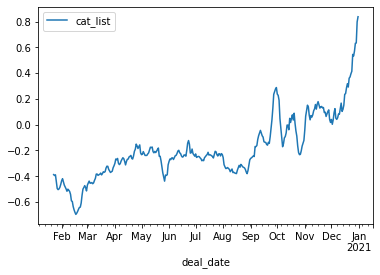

In [11]:
tmp = china_data.groupby('deal_date').count().cat_list.to_frame()
tmp = pd.DataFrame({'deal_date':pd.date_range(tmp.index[0],
              tmp.index[-1])}).set_index('deal_date').join(
tmp).fillna(0)
tmp = tmp.rolling(7*4).sum().dropna()
tmp.pct_change(360).dropna().plot()

# Performance 

In [12]:
china_data = pd.read_csv('paper_data/deal_news_data_processed.csv',
                        index_col=[0])

In [13]:
official_df = pd.read_excel('NFFAI_per_sector/fixed_investment202012.xls').iloc[1:,:]
official_df.columns = [i.replace('年','').replace('月','') for i in official_df.iloc[0,:].values]
official_df = official_df.set_index('指标')
official_df.columns = [i[:4]+'-'+i[4:].zfill(2) for i in official_df.columns]
#official_df.index

In [14]:
official_cols = ['医药制造业固定资产投资额累计增长(%)',
                '制造业固定资产投资额累计增长(%)',
                '信息传输、软件和信息技术服务业固定资产投资额累计增长(%)',
                '房地产业固定资产投资额累计增长(%)',
                '计算机、通信和其他电子设备制造业固定资产投资额累计增长(%)',
                 '金融业固定资产投资额累计增长(%)',
                 '教育固定资产投资额累计增长(%)',
                '批发和零售业固定资产投资额累计增长(%)',
                '汽车制造业固定资产投资额累计增长(%)',
                '食品制造业固定资产投资额累计增长(%)']


proxy_cols = ['Biotech',
              'Manufacturing',
               'IT',
              'RE',
              'Electronics',
             'financial',
             'education',
             'Retail&Wholesale',
             'Automotive',
             'Food'
             ] 


proxy_sectors = [['pharmaceutical','medical','healthcare','biotech'],
                 ['manufacturer','automobile','semiconductor','hardware'],
                 ['information',"internet","software","game"],
                 ['buildings','estate'],
                 ['semiconductor','hardware'],
                 ['financial','payment'],
                ['education'],
                ['commerce','food','drink'],
                ['automobile'],
                 ['food']
                ]


if len(proxy_sectors) == len(proxy_cols) and len(proxy_cols) == len(official_cols):
    list_df = []
    for official_col, proxy_col, proxy_sector in zip(
official_cols,
    proxy_cols,
    proxy_sectors
): 
        print(proxy_sector)
        official_sub = official_df.ix[official_col].to_frame()
        official_sub.columns = ['official']
        tmp = china_data[[i.strip() in proxy_sector
                  for i in china_data['cat_list']]].groupby(
'deal_date').count()["detailed_deal_info"].to_frame()
        tmp = pd.DataFrame({'date':pd.date_range(tmp.index[0],
              tmp.index[-1])}).set_index('date').join(
        tmp).fillna(0)
        #print(tmp.columns)
        tmp = tmp.rolling(7*4).mean().dropna()
        tmp = tmp.reset_index()
        tmp.date = list(map(lambda x:str(x)[:7],tmp.date))
        result = tmp.groupby('date').mean()
        result['year'] = list(map(lambda x:x[:4], result.index))
        tmp = result.reset_index().pivot(index = 'date',columns='year', values='detailed_deal_info').cumsum().reset_index()
        tmp = pd.melt(tmp,id_vars='date',value_vars=['2019','2020']).dropna().set_index('date')
        tmp = tmp.drop('year',1)
        result = tmp.pct_change(12).dropna().join(
        official_sub
).dropna()          
        result['official'] = result['official'].astype(float)
        result['sector'] = [proxy_col]*len(result)
        result.columns = ['detailed_deal_info','official','sector']
        list_df.append(result.reset_index(drop=False))
else:
    print('ERROR!')

['pharmaceutical', 'medical', 'healthcare', 'biotech']


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


['manufacturer', 'automobile', 'semiconductor', 'hardware']
['information', 'internet', 'software', 'game']
['buildings', 'estate']
['semiconductor', 'hardware']
['financial', 'payment']
['education']
['commerce', 'food', 'drink']
['automobile']
['food']


Text(0.5, 0, 'News Indicator')

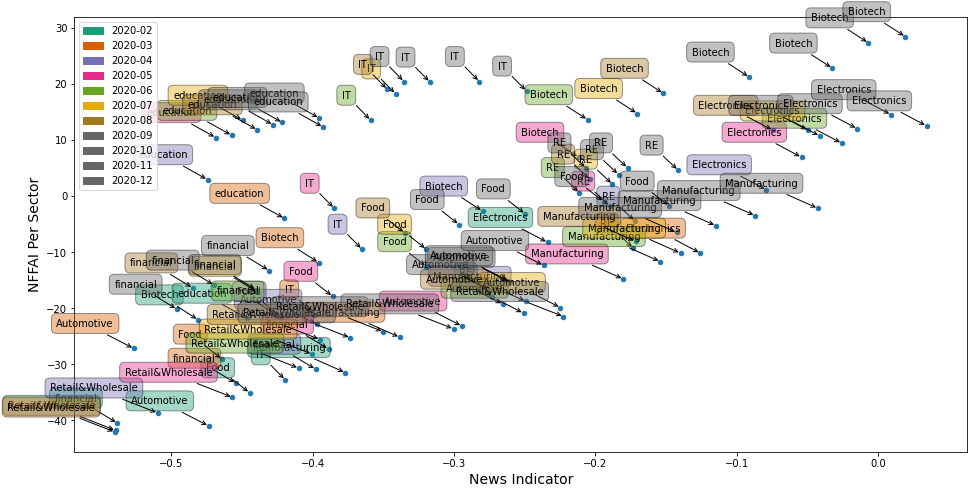

In [21]:
import matplotlib.patches as mpatches

result_df = pd.concat(list_df,axis=0)
result_df[['detailed_deal_info','official']] = result_df[['detailed_deal_info','official']].astype(float)
result_df.plot.scatter(x='detailed_deal_info',y = 'official', figsize=(16,8))
months = pd.concat(list_df,axis=0)['date'].unique()
colors = [plt.cm.Dark2(i) for i in range(len(months))]
patch_list=[]
for mo, color in zip(months,colors): 
    tmp_df = result_df[result_df['date']==mo]
    patch = mpatches.Patch(color=color, label=mo)
    patch_list.append(patch)
    for label, x, y in zip(tmp_df['sector'], tmp_df["detailed_deal_info"].astype(float), 
                       tmp_df['official'].astype(float)):
        plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc=color, alpha=.4),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
plt.legend(handles=patch_list)
plt.ylabel('NFFAI Per Sector',fontsize =14)
plt.xlabel('News Indicator',fontsize =14)
#plt.savefig('paper_fig/fig7.png',
#           bbox_inches='tight')

Text(0.5, 0, 'News Indicator')

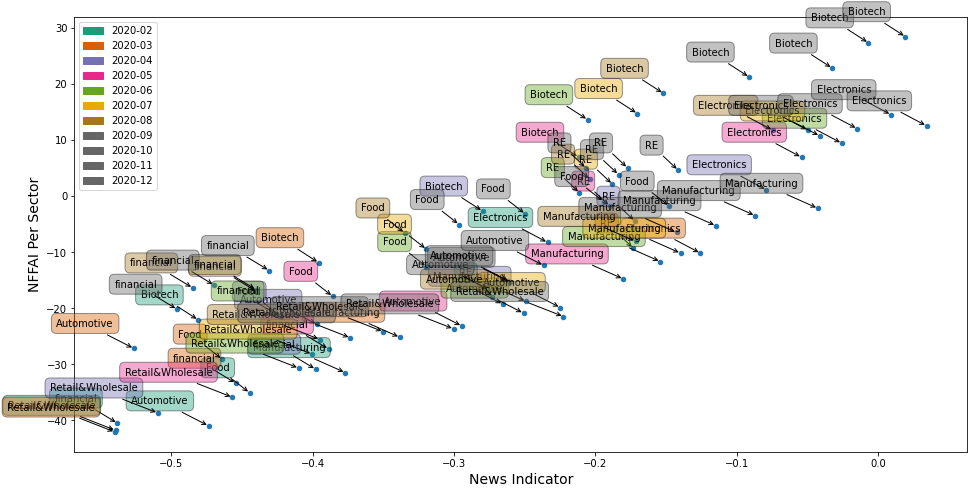

In [22]:
import matplotlib.patches as mpatches

result_df = pd.concat(list_df,axis=0)
result_df = result_df[[i in ['Biotech',
              'Manufacturing',
              'RE',
              'estate',
              'Electronics',
             'financial',
             'Retail&Wholesale',
             'Automotive',
             'Food'
             ] for i in result_df['sector']]]
result_df[['detailed_deal_info','official']] = result_df[['detailed_deal_info','official']].astype(float)
result_df.plot.scatter(x='detailed_deal_info',y = 'official', figsize=(16,8))
months = pd.concat(list_df,axis=0)['date'].unique()
colors = [plt.cm.Dark2(i) for i in range(len(months))]
patch_list=[]
for mo, color in zip(months,colors): 
    tmp_df = result_df[result_df['date']==mo]
    patch = mpatches.Patch(color=color, label=mo)
    patch_list.append(patch)
    for label, x, y in zip(tmp_df['sector'], tmp_df["detailed_deal_info"].astype(float), 
                       tmp_df['official'].astype(float)):
        plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc=color, alpha=.4),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
plt.legend(handles=patch_list)
plt.ylabel('NFFAI Per Sector',fontsize =14)
plt.xlabel('News Indicator',fontsize =14)
#plt.savefig('paper_fig/fig7.png',
#           bbox_inches='tight')

# R-squared and Pearson's R per sector

In [71]:
dict_rsquare_pearson = {}
sec_list = result_df.sector.unique()
for sec in sec_list:
    tmp = result_df[result_df['sector']==sec][['detailed_deal_info','official']]
    X = sm.add_constant(tmp.detailed_deal_info.values)
    y = tmp.official
    model = sm.OLS(y, X)
    results = model.fit()
    print(sec)
    print(results.summary())
    print()
    dict_rsquare_pearson[sec] = [round(results.rsquared,4), round(
        tmp.corr().iloc[0,-1],4)]

Biotech
                            OLS Regression Results                            
Dep. Variable:               official   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     245.6
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           7.70e-08
Time:                        02:25:21   Log-Likelihood:                -27.507
No. Observations:                  11   AIC:                             59.01
Df Residuals:                       9   BIC:                             59.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2751      1.545     18.945 

/home/jupyter/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/jupyter/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/jupyter/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/jupyter/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/jupyter/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/jupyter/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only val

In [79]:
official_cols = ['医药制造业固定资产投资额累计增长(%)',
                '制造业固定资产投资额累计增长(%)',
                '信息传输、软件和信息技术服务业固定资产投资额累计增长(%)',
                '房地产业固定资产投资额累计增长(%)',
                '计算机、通信和其他电子设备制造业固定资产投资额累计增长(%)',
                 '金融业固定资产投资额累计增长(%)',
                 '教育固定资产投资额累计增长(%)',
                '批发和零售业固定资产投资额累计增长(%)',
                '汽车制造业固定资产投资额累计增长(%)',
                '食品制造业固定资产投资额累计增长(%)']

proxy_cols = ['Biotech',
              'Manufacturing',
               'IT',
              'RE',
              'Electronics',
             'financial',
             'education',
             'Retail&Wholesale',
             'Automotive',
             'Food'
             ] 

proxy_sectors = [['pharmaceutical','medical','healthcare','biotech'],
                 ['manufacturer','automobile','semiconductor','hardware'],#'food','drink'], #machinery
                 ['information',"internet","software","game"],
                 ['buildings','estate'],
                 ['semiconductor','hardware'],
                 ['financial','payment'],
                ['education'],
                ['commerce','food','drink'],
                ['automobile'],
                 ['food']
                ]
proxy_sector_init = proxy_sectors 

for official_col, proxy_sector_init, proxy_col in zip(
official_cols,
    proxy_sectors,
    proxy_cols
):
    official_sub = official_df.loc[official_col].to_frame()
    official_sub.columns = ['official']
                 
    print(official_col)
    print('---------')
    
    for num in range(1, len(proxy_sector_init)+1):
        proxy_sectors = list(itertools.combinations(proxy_sector_init, num)
    )
        
        for proxy_sector in proxy_sectors:
            tmp = china_data[[i.strip() in [i.lower() for i in proxy_sector]
                  for i in china_data['cat_list']]].groupby(
'deal_date').count()["detailed_deal_info"].to_frame()
            tmp = pd.DataFrame({'date':pd.date_range(tmp.index[0],
              tmp.index[-1])}).set_index('date').join(
        tmp).fillna(0)
            tmp = tmp.rolling(7*4).sum().dropna()
            tmp = tmp.reset_index()
            tmp.date = list(map(lambda x:str(x)[:7],tmp.date))
            result = tmp.groupby('date').mean()
            result['year'] = list(map(lambda x:x[:4], result.index))
            tmp = result.reset_index().pivot(index = 'date',columns='year', values='detailed_deal_info').cumsum().reset_index()
            tmp = pd.melt(tmp,id_vars='date',value_vars=['2019','2020']).dropna().set_index('date')
            tmp = tmp.drop('year',1)
            result = tmp.pct_change(12).dropna().join(
        official_sub
).dropna()
            result['official'] = result['official'].astype(float)
            corr = result.corr().iloc[0,-1]
            proxy_sector = list(proxy_sector)
            print(sorted(proxy_sector), corr)
            y = result['official']
            X = sm.add_constant(result['value'].values)
            model = sm.OLS(y, X)
            results = model.fit()
            print(round(results.rsquared,4))
                

医药制造业固定资产投资额累计增长(%)
---------
['pharmaceutical'] 0.9095297110781634
0.8272
['medical'] 0.9863533076484557
0.9729
['healthcare'] 0.9529518401901718
0.9081
['biotech'] 0.6318123374448138
0.3992
['medical', 'pharmaceutical'] 0.985800231593049
0.9718
['healthcare', 'pharmaceutical'] 0.9631565325482706
0.9277
['biotech', 'pharmaceutical'] 0.9379030048481075
0.8797
['healthcare', 'medical'] 0.9812313126565111
0.9628
['biotech', 'medical'] 0.9829464518847463
0.9662
['biotech', 'healthcare'] 0.9410346068014818
0.8855
['healthcare', 'medical', 'pharmaceutical'] 0.9834929356191368
0.9673
['biotech', 'medical', 'pharmaceutical'] 0.9843955212189324
0.969
['biotech', 'healthcare', 'pharmaceutical'] 0.9648309391104749
0.9309
['biotech', 'healthcare', 'medical'] 0.9786709519544393
0.9578
['biotech', 'healthcare', 'medical', 'pharmaceutical'] 0.9821696201638965
0.9647
制造业固定资产投资额累计增长(%)
---------
['manufacturer'] 0.9132160088105873
0.834
['automobile'] 0.897099247862038
0.8048
['semiconductor'] 0.66115

# Market Consensus

          expected      true
expected  1.000000  0.633192
true      0.633192  1.000000
47.04363636363635
2.3454545454545457


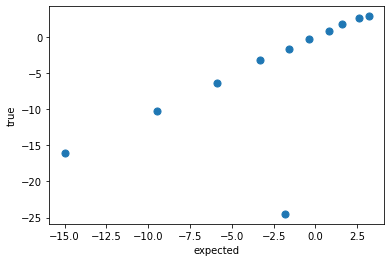

In [17]:
#market_expectation 
from sklearn.metrics import mean_squared_error,mean_absolute_error

#market_expectation 
expected = pd.DataFrame({'date': ['2020-02', 
                                  '2020-03', '2020-04','2020-05',
                                  '2020-06','2020-07','2020-08','2020-09',
                                  '2020-10','2020-11','2020-12'],
'expected': [-1.8,
             -15,
             -9.5,-5.9,-3.3,-1.6,-0.4,0.8,1.6,2.6, 3.2],
'true': [-24.5,
         -16.1, 
         -10.3,-6.3,-3.1,-1.6,-0.3,0.8,1.8,2.6, 2.9]}).set_index('date')

print(expected.corr())
#1. http://economy.caixin.com/2020-03-16/101528938.html
#2. https://finance.sina.com.cn/money/bond/market/2020-04-16/doc-iircuyvh8165813.shtml
#3.https://cn.wsj.com/articles/%E4%B8%AD%E5%9B%BD1-4%E6%9C%88%E4%B8%8D%E5%90%AB%E5%86%9C%E6%88%B7%E5%9B%BA%E5%AE%9A%E8%B5%84%E4%BA%A7%E6%8A%95%E8%B5%84%E5%90%8C%E6%AF%94%E4%B8%8B%E9%99%8D10-3%EF%BC%8C%E4%B8%8D%E5%8F%8A%E9%A2%84%E6%9C%9F-11589508909
#4.https://cn.reuters.com/article/china-may-industry-consumption-poll-0612-idCNKBS23J1MU
#5. https://www.cnbc.com/2019/06/14/china-may-industrial-output-weakest-in-17-years.html
#6. https://www.reuters.com/article/us-china-economy-activity/chinas-economic-recovery-underwhelms-as-consumer-comeback-stays-elusive-idUSKCN25A0EA
#7.https://asia.nikkei.com/Economy/China-s-retail-sales-mark-first-expansion-this-year-in-August
#8.https://www.reuters.com/article/us-china-economy-activity/china-september-industrial-output-rises-6-9-year-on-year-retail-sales-up-3-3-idUSKBN27405H
#9. https://www.reuters.com/article/us-china-economy-activity/chinas-factory-output-beats-forecasts-as-asia-shakes-off-covid-slump-idUKKBN27W0BB
#10: https://www.bloomberg.com/news/articles/2020-12-15/china-s-economic-recovery-strengthens-fueled-by-export-boom
#11:https://www.reuters.com/article/us-china-economy-activity/china-industrial-output-rises-73-year-on-year-in-december-retail-sales-miss-forecast-idUSKBN29N042
expected.plot.scatter(x='expected',y = 'true',s = 50)

print(mean_squared_error(expected['expected'].values, 
                   expected.true))
print(mean_absolute_error(expected['expected'].values, 
                   expected.true))

In [18]:
tmp = china_data.groupby(
'deal_date').count()["detailed_deal_info"].to_frame()
tmp = pd.DataFrame({'date':pd.date_range(tmp.index[0],
              tmp.index[-1])}).set_index('date').join(
        tmp).fillna(0)
tmp = tmp.rolling(7*4).mean().dropna()
tmp = tmp.reset_index()
tmp.date = list(map(lambda x:str(x)[:7],tmp.date))
result = tmp.groupby('date').mean()
result['year'] = list(map(lambda x:x[:4], result.index))
tmp = result.reset_index().pivot(index = 'date',columns='year', values='detailed_deal_info').cumsum().reset_index()
tmp = pd.melt(tmp,id_vars='date',value_vars=['2019','2020']).dropna().set_index('date')
tmp = tmp.drop('year',1)
result = tmp.pct_change(12).dropna()
result = result.join(expected).dropna()
result.columns = ['PE_News_Indicator','Market_Consensus','NFFAI_All_Sectors']
result.corr()

,PE_News_Indicator,Market_Consensus,NFFAI_All_Sectors
PE_News_Indicator,1.000000,0.730096,0.923595
Market_Consensus,0.730096,1.000000,0.633192
NFFAI_All_Sectors,0.923595,0.633192,1.000000


In [19]:
X = sm.add_constant(result.PE_News_Indicator.values)
y = result.NFFAI_All_Sectors

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      NFFAI_All_Sectors   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     52.24
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           4.93e-05
Time:                        14:45:43   Log-Likelihood:                -28.432
No. Observations:                  11   AIC:                             60.86
Df Residuals:                       9   BIC:                             61.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8619      5.336      6.159      0.0

/home/jupyter/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [20]:
X = sm.add_constant(result.Market_Consensus.values)
y = result.NFFAI_All_Sectors

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      NFFAI_All_Sectors   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     6.023
Date:                Thu, 28 Jan 2021   Prob (F-statistic):             0.0365
Time:                        14:45:45   Log-Likelihood:                -36.160
No. Observations:                  11   AIC:                             76.32
Df Residuals:                       9   BIC:                             77.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2552      2.417     -0.933      0.3

/home/jupyter/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
